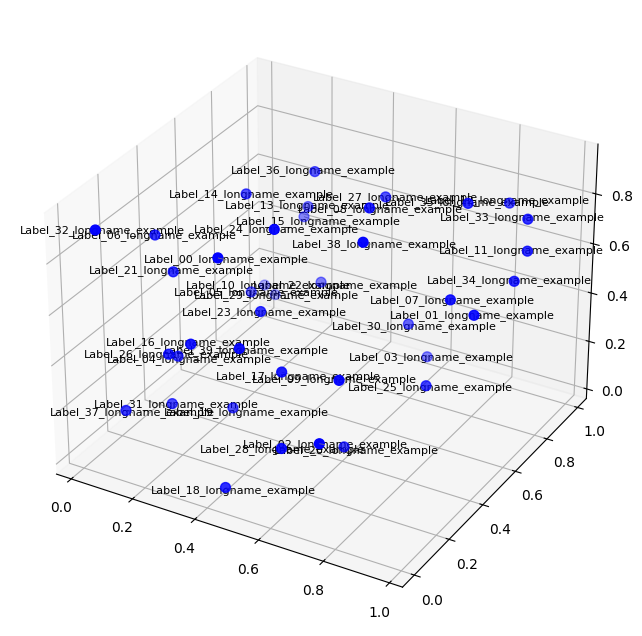

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from adjustText import adjust_text

# Generate sample data
np.random.seed(42)
num_points = 40
x = np.random.rand(num_points)
y = np.random.rand(num_points)
z = np.random.rand(num_points)
labels = [f"Label_{i:02d}_longname_example" for i in range(num_points)]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', s=50)

# Function to project 3D points to 2D screen space
def project_to_2d(ax, x, y, z):
    """Project 3D points to 2D screen coordinates."""
    return np.array([proj_transform(xi, yi, zi, ax.get_proj())[:2] for xi, yi, zi in zip(x, y, z)])

# Function to back-project adjusted 2D positions into 3D
def back_project_to_3d(ax, x, y, z, adjusted_2d):
    """Back-project adjusted 2D positions into 3D using original z-coordinate."""
    adjusted_3d = []
    original_2d = project_to_2d(ax, x, y, z)
    for (orig_x, orig_y), (adj_x, adj_y), xi, yi, zi in zip(original_2d, adjusted_2d, x, y, z):
        # Calculate the 2D shift
        dx, dy = adj_x - orig_x, adj_y - orig_y
        # Apply the shift to the original 3D point
        # Keep the z-coordinate the same
        adjusted_3d.append((xi + dx, yi + dy, zi))
    return np.array(adjusted_3d)

# Project points to 2D
proj_points = project_to_2d(ax, x, y, z)

# Create a temporary 2D plot for `adjustText`
fig2, ax2 = plt.subplots()
texts = [ax2.text(px, py, label, fontsize=8) for (px, py), label in zip(proj_points, labels)]
ax2.scatter(proj_points[:, 0], proj_points[:, 1], color='b', s=50, alpha=0)  # Invisible points for adjustText

# Adjust text in 2D
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Extract adjusted positions
adjusted_2d = np.array([[text.get_position()[0], text.get_position()[1]] for text in texts])
plt.close(fig2)  # Close the temporary 2D figure

# Back-project adjusted positions into 3D
adjusted_3d = back_project_to_3d(ax, x, y, z, adjusted_2d)

# Add adjusted labels to the 3D plot and draw arrows
for orig, adj, label in zip(zip(x, y, z), adjusted_3d, labels):
    # Add the label at the adjusted position
    ax.text(adj[0], adj[1], adj[2], label, fontsize=8, ha='center', va='center')
    # Draw an arrow from the original point to the adjusted position
    ax.quiver(
        orig[0], orig[1], orig[2],  # Start point
        adj[0] - orig[0], adj[1] - orig[1], adj[2] - orig[2],  # Adjustment vector
        arrow_length_ratio=0.1,
        color='gray',
        linewidth=0.5
    )

plt.show()
